In [108]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_gaussian_quantiles

In [121]:
N = 1000
_X, _Y = make_gaussian_quantiles(
    mean=None,
    cov=0.1,
    n_samples=N,
    n_features=2,
    n_classes=2,
    shuffle=True,
    random_state=None
)
_Y = _Y[:, np.newaxis]

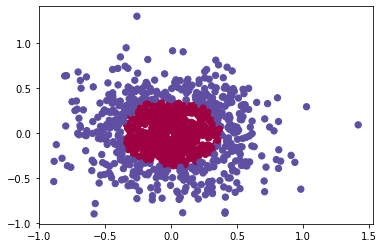

In [122]:
plt.scatter(_X[:, 0], _X[:, 1],  c=_Y, s=40, cmap=plt.cm.Spectral)

## Funciones de activación

In [111]:
def sigmoid(x, derivate=False):
    if derivate:
        return np.exp(-x) / ((np.exp(-x) + 1) ** 2)
    else:
        return 1 / (1 + np.exp(-x))
    
def relu(x, derivate = False):
    if derivate:
        x[x <= 0] = 0
        x[x > 0] = 1
        return x
    else:
        return np.maximum(0, x)

## Funciones de perdida

In [112]:
def mse(y, _y, derivate=False):
    if derivate:
        return (_y - y)
    else:
        return np.mean((_y - y) ** 2)

In [113]:
def initializer_parameters_deep(layers_dim):
    parameters = {}
    n = len(layers_dim)
    
    for l in range(0, n - 1):
        parameters['W' + str(l + 1)] = (np.random.rand(layers_dim[l], layers_dim[l + 1]) * 2) - 1
        parameters['b' + str(l + 1)] = (np.random.rand(1, layers_dim[l + 1]) * 2) - 1
        
    return parameters

In [114]:
layer_dims = [2, 4, 8, 1]
cnn = initializer_parameters_deep(layer_dims)
cnn

{'W1': array([[ 0.74226003, -0.48419958, -0.99632506, -0.13702969],
        [-0.03251871,  0.03815762,  0.83006783, -0.6104139 ]]),
 'b1': array([[-0.43662135, -0.45063852,  0.97472191, -0.61410089]]),
 'W2': array([[ 0.49666119, -0.69391435,  0.51329329, -0.11972995, -0.96135841,
          0.75582974, -0.95451486,  0.64238279],
        [-0.05178894,  0.29552835,  0.90349808,  0.23872942, -0.02774173,
         -0.09911014, -0.22387444,  0.48354941],
        [-0.39135604,  0.74443178,  0.39182206,  0.32513095, -0.88744249,
         -0.17475921,  0.04597009, -0.26830236],
        [-0.4510278 , -0.63790396, -0.14639667, -0.34525528, -0.96431284,
         -0.18366878, -0.09594759, -0.32780291]]),
 'b2': array([[ 0.57299175, -0.7941034 ,  0.71865045, -0.39793562, -0.62108158,
          0.2376025 , -0.28042383, -0.73292935]]),
 'W3': array([[-0.79330113],
        [ 0.42501346],
        [-0.60697414],
        [-0.51390474],
        [ 0.16750053],
        [-0.10737106],
        [-0.71038378],


In [115]:
cnn['W1'].shape, cnn['W2'].shape

((2, 4), (4, 8))

In [116]:
_X.shape

(1000, 2)

In [117]:
np.matmul(_X, cnn['W1']).shape

(1000, 4)

In [118]:
(_X @ cnn['W1']).shape

(1000, 4)

In [125]:
def train(X_data, lr, params, training=True):
    # Forward

    params['A0'] = X_data
        
    params['Z1'] = np.matmul(params['A0'],params['W1']) + params['b1']
    params['A1'] = relu(params['Z1'])
    
    params['Z2'] = np.matmul(params['A1'],params['W2']) + params['b2']
    params['A2'] = relu(params['Z2'])
       
    params['Z3'] = np.matmul(params['A2'],params['W3']) + params['b3']
    params['A3'] = sigmoid(params['Z3'])
  
    output = params['A3']
    
    if training:
        
        # Backpropagation
    
        params['dZ3'] =  mse(_Y, output, True) * sigmoid(params['A3'], True)
        params['dW3'] = np.matmul(params['A2'].T,params['dZ3'])
        
        params['dZ2'] = np.matmul(params['dZ3'],params['W3'].T) * relu(params['A2'],True)
        params['dW2'] = np.matmul(params['A1'].T,params['dZ2'])
        
        params['dZ1'] = np.matmul(params['dZ2'],params['W2'].T) * relu(params['A1'],True)
        params['dW1'] = np.matmul(params['A0'].T,params['dZ1'])

        # Gradinet Descent:
           
        params['W3'] = params['W3'] - params['dW3'] * lr
        params['b3'] = params['b3'] - (np.mean(params['dZ3'],axis=0, keepdims=True)) * lr
        
        params['W2'] = params['W2'] - params['dW2'] * lr
        params['b2'] = params['b2'] - (np.mean(params['dZ2'],axis=0, keepdims=True)) * lr
        
        params['W1'] = params['W1'] -params['dW1'] * lr
        params['b1'] = params['b1'] - (np.mean(params['dZ1'],axis=0, keepdims=True)) * lr
    
    return output

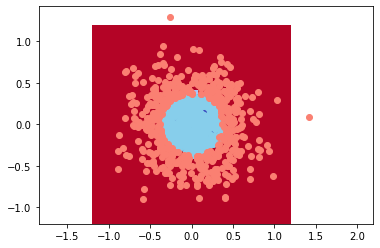

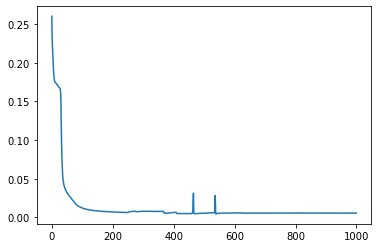

In [127]:
import time
from IPython.display import clear_output

layer_dims = [2, 4, 8, 1]
cnn = initializer_parameters_deep(layer_dims)
errors = []

for _ in range(30000):
    
    output = train(_X, 0.001, cnn)
    
    if _ % 30 == 0:
        loss = mse(_Y, output)
        errors.append(loss)
        
        res = 50
        
        _x0 = np.linspace(-1.2, 1.2, res)
        _x1 = np.linspace(-1.2, 1.2, res)
        
        out = np.zeros((res, res))
        
        for i, x0 in enumerate(_x0):
            for j, x1 in enumerate(_x1):
                out[i, j] = train(np.array([[x0, x1]]), 1, cnn, training=False)
               
        plt.pcolormesh(_x0, _x1, out, cmap='coolwarm')
        
        plt.scatter(_X[_Y[:, 0] == 0, 0], _X[_Y[:, 0] == 0, 1], c='skyblue')
        plt.scatter(_X[_Y[:, 0] == 1, 0], _X[_Y[:, 0] == 1, 1], c='salmon')
        plt.axis('equal')
        
        clear_output(wait=True)
        plt.show()
        plt.plot(range(len(errors)), errors)
        
        plt.show()
        time.sleep(0.5)

In [128]:
data_test = np.random.rand(1000, 2) * 2 - 1
y = train(data_test, 0.0001, cnn, training=False)

In [129]:
y = np.where(y >= 0.5, 1, 0)

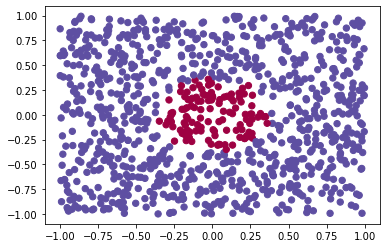

In [130]:
plt.scatter(data_test[:, 0], data_test[:, 1], c=y[:, 0], s=40, cmap=plt.cm.Spectral)